# A. Import Data

In [45]:
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("palm_ffb.csv")

In [3]:
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
Date             130 non-null object
SoilMoisture     130 non-null float64
Average_Temp     130 non-null float64
Min_Temp         130 non-null float64
Max_Temp         130 non-null float64
Precipitation    130 non-null float64
Working_days     130 non-null int64
HA_Harvested     130 non-null float64
FFB_Yield        130 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.2+ KB


In [5]:
df.shape, df.size

((130, 9), 1170)

## A.1 Data Preparation & Cleaning
Make month and year columns

In [6]:
def get_month(data):
    data_splitted = data.split('.')
    return int(data_splitted[1])

def get_year(data):
    data_splitted = data.split('.')    
    return int(data_splitted[2])

In [7]:
df['month'] = df.apply(lambda x: get_month(x['Date']),axis=1)
df['year'] = df.apply(lambda x: get_year(x['Date']),axis=1)

In [8]:
#drop Date column
df.drop(columns=['Date'], inplace=True)

In [9]:
df.tail()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,month,year
125,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29,6,2018
126,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42,7,2018
127,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61,8,2018
128,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91,9,2018
129,510.8,26.819355,21.0,34.4,207.0,26,771805.3922,2.04,10,2018


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 10 columns):
SoilMoisture     130 non-null float64
Average_Temp     130 non-null float64
Min_Temp         130 non-null float64
Max_Temp         130 non-null float64
Precipitation    130 non-null float64
Working_days     130 non-null int64
HA_Harvested     130 non-null float64
FFB_Yield        130 non-null float64
month            130 non-null int64
year             130 non-null int64
dtypes: float64(7), int64(3)
memory usage: 10.2 KB


# B. Descriptive Analytics

## B.1 Calculating Central Tendencies

In [11]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,month,year
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231,6.423077,2012.923077
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751,3.434583,3.136718
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000,1.000000,2008.000000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000,3.250000,2010.000000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000,6.000000,2013.000000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500,9.000000,2016.000000
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000,12.000000,2018.000000


In [12]:
#checking null data field
df.isnull().sum()

SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
month            0
year             0
dtype: int64

### Findings
The data has 130 rows and 9 columns.
It has no null field.

## B.2 Correlation Check

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


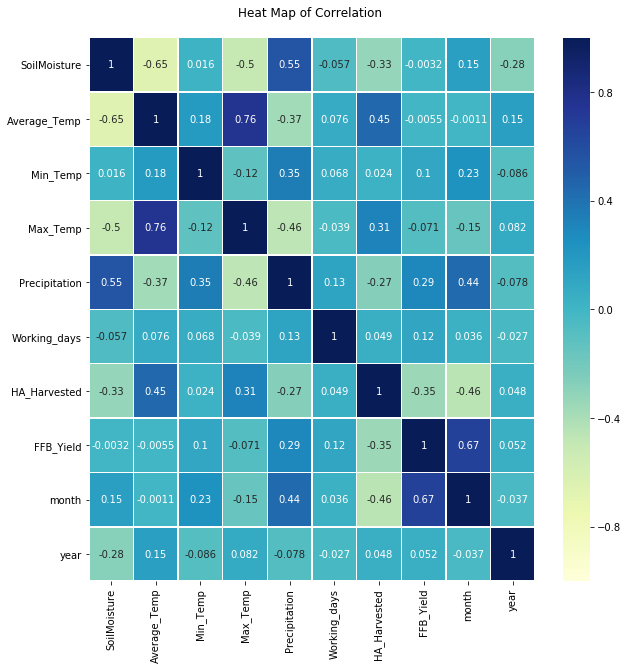

In [13]:
corr = df.corr();
# print(corr)
# sns.heatmap(corr, annot = True);
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
plt.title('Heat Map of Correlation \n')
sns.heatmap(corr,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

In [14]:
# df.corr()

## B.3 Check if Each Column is Normally Distributed 

In [15]:
from scipy.stats import shapiro

#normality test
def check_normality(data):
    stat, p = shapiro(data)
#     print(stat, p)
    
    alpha = 0.05
    if p > alpha:
        print('Sample looks "Normally Distributed"')
    else:
        print('Sample does not look "Normally Distributed"')
        
def draw_graph(the_column):
    #draw distribution
    mean = df[the_column].mean()
    median = df[the_column].median()
    #mode = df[the_column].mode() # we don't need to find the mode because of the data type
    fig, ax = plt.subplots(figsize=(10,6))

    sns.distplot(df[the_column])
    plt.title('Distribution Plot of Additive: '+ column)
    plt.axvline(mean,color='green',label='Mean')
    plt.axvline(median,color='blue',label='Median')
    plt.legend()
    plt.plot()

additives SoilMoisture:
Sample looks "Normally Distributed"
-------------
additives Average_Temp:
Sample looks "Normally Distributed"
-------------
additives Min_Temp:
Sample does not look "Normally Distributed"
-------------
additives Max_Temp:
Sample looks "Normally Distributed"
-------------
additives Precipitation:
Sample does not look "Normally Distributed"
-------------
additives Working_days:
Sample does not look "Normally Distributed"
-------------
additives HA_Harvested:
Sample looks "Normally Distributed"
-------------
additives FFB_Yield:
Sample looks "Normally Distributed"
-------------
additives month:
Sample does not look "Normally Distributed"
-------------
additives year:
Sample does not look "Normally Distributed"
-------------


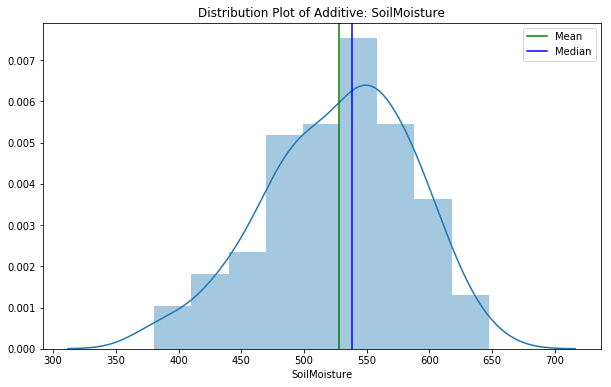

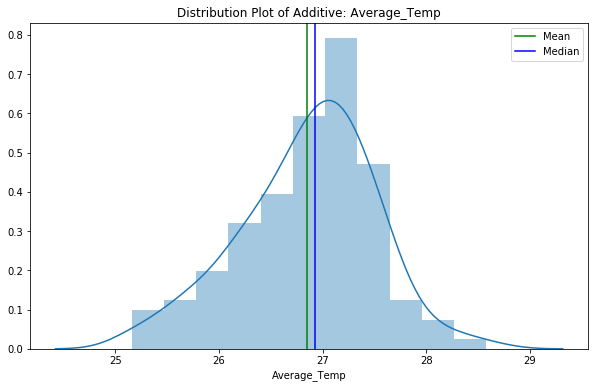

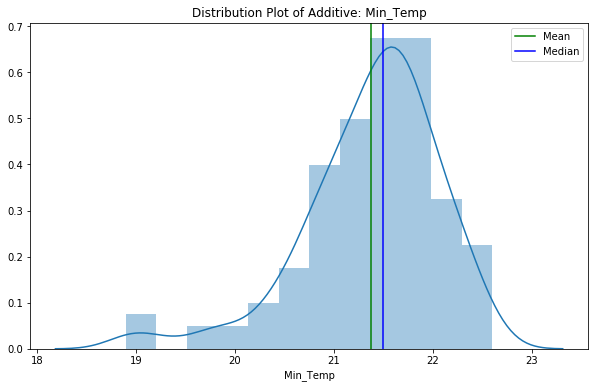

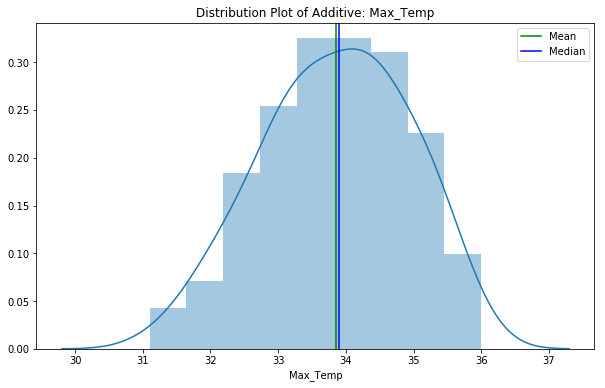

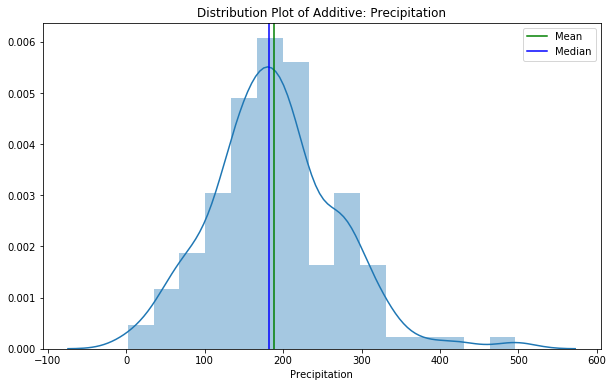

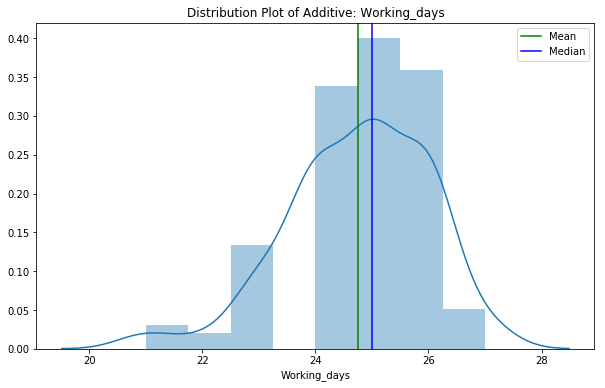

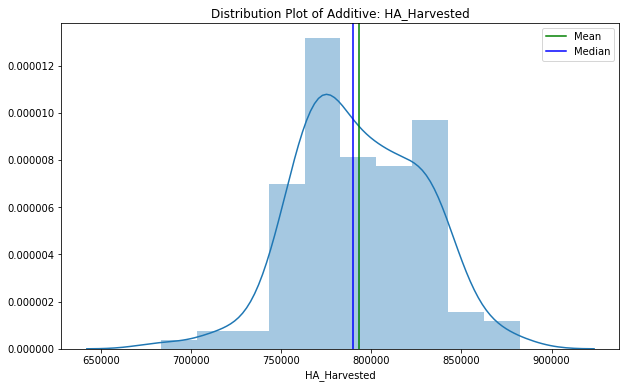

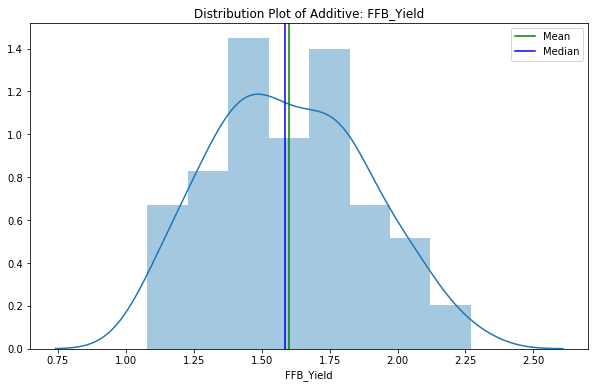

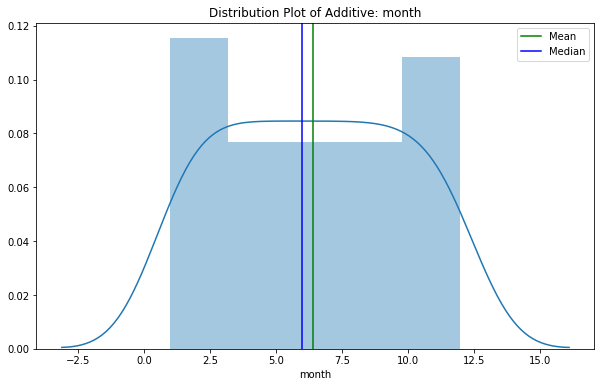

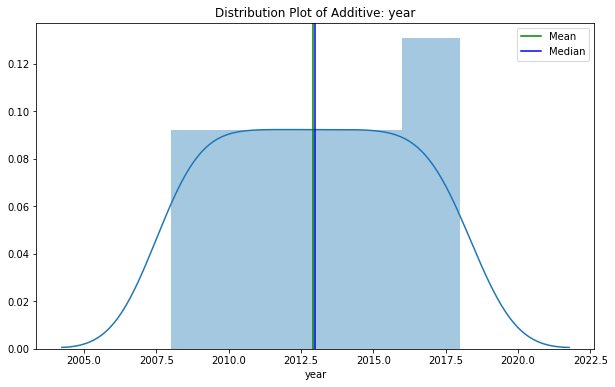

In [16]:
for column in df.columns:
    print('additives %s:' % column)
    check_normality(df[column])
    draw_graph(column)
    print('-------------')

## B.4 Checking Outliers

In [17]:
df.columns.size

10

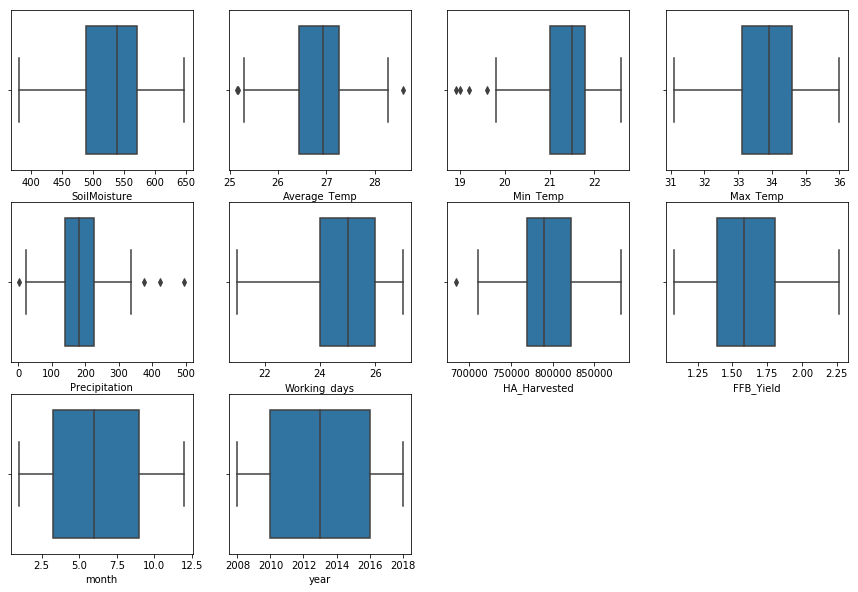

In [18]:
plt.figure(figsize=(15,10))
pos = 1
for col in df.columns:
    plt.subplot(3, 4, pos)
    sns.boxplot(df[col])
    pos += 1

# C. Feature Selection & Its Relevancy
We can identify and selecting a subset of input variables that are most relevant to the target variable, in this case FFB_Yield, with feature selection.

## C.1 Splitting Data
We can split the data into training and test sets so we can fit and evaluate a learning model latter

In [95]:
# from collections import Counter
from sklearn.preprocessing import MinMaxScaler #StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline

In [20]:
X = df.drop(columns=['FFB_Yield']).values
Y = df['FFB_Yield'].values

In [21]:
X.shape, Y.shape

((130, 9), (130,))

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0,)

In [23]:
#data normalization
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train.shape, X_test.shape

((91, 9), (39, 9))

## C.2 Feature Selection

There are two popular feature selection techniques for regression data. They are:
<ul>
    <li>Correlation Statistics</li> 
    <li>Mutual Info Statistics</li>
</ul>

In [74]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression

In [211]:
def select_features_analyses(X_train, y_train, method='correlation'):
    if method == 'correlation': #correlation statistics
        fs = SelectKBest(score_func=f_regression, k='all')
    else: #mutual info statistics
        fs = SelectKBest(score_func=mutual_info_regression, k='all')

    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    
    # Get columns to keep and create new dataframe with those only
    # only when you select k is not to 'all'
    cols = fs.get_support(indices=True)
    chosen_columns = df.iloc[:,cols]
    
    df_attributes = df.copy()
    df_attributes.drop(columns=['FFB_Yield'], inplace=True)
    
    coefficients = pd.concat([pd.DataFrame(df_attributes.columns),
                              pd.DataFrame(np.transpose(fs.scores_))],
                             axis = 1)
    coefficients.columns = ['attr', 'value']
    print(coefficients.sort_values(by=['value'], ascending=False))

    # plot the scores
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    plt.title('Bar Chart of the Input Features (x) vs. '+method+' Feature Importance (y)')
    plt.xlabel('Feature no #')
    plt.ylabel('Value')
    plt.show()

            attr      value
7          month  55.470721
6   HA_Harvested   9.077542
4  Precipitation   6.048747
5   Working_days   3.480961
3       Max_Temp   2.801411
2       Min_Temp   2.662317
8           year   0.420806
0   SoilMoisture   0.067333
1   Average_Temp   0.039527


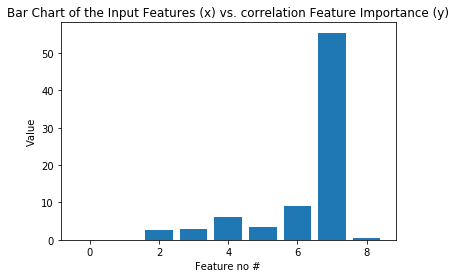

In [212]:
# feature selection by correlation statistics
select_features_analyses(X_train, Y_train, 'correlation')

            attr     value
7          month  0.509784
4  Precipitation  0.191761
8           year  0.156662
2       Min_Temp  0.104501
1   Average_Temp  0.081999
6   HA_Harvested  0.059174
3       Max_Temp  0.047541
0   SoilMoisture  0.021850
5   Working_days  0.000000


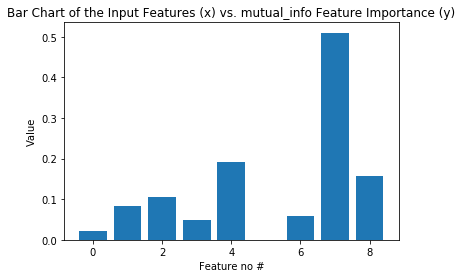

In [213]:
# feature selection by mutual info statistics
select_features_analyses(X_train, Y_train, 'mutual_info')

### C. Findings:
If we selected 5 most-important features, _Correlation_ dan _Mutual-info_ techniques will produce different feature selection results. 

_Correlation Statistics_:

| Feature No # | Feature Name | Value |
| --- | --- | --- |
| 7 | month | 55.47 |
| 6 | HA_Harvested | 9.07 |
| 4 | Precipitation | 6.04 |
| 5 | Working_days | 3.48 |
| 3 | Max_Temp | 2.80 |

-------------------------------
_Mutual-info Statistics_:

| Feature No # | Feature Name | Value |
| --- | --- | --- |
| 7 | month | 0.50 |
| 4 | Precipitation | 0.19 |
| 8 | year | 0.15 |
| 2 | Min_Temp | 0.14 |
| 1 | Average_Temp | 0.09 |

--------------------------------
Therefore, how do you know which one to use? A robust approach is to evaluate models using different feature selection methods (and numbers of features) and select the method that results in a model with the best performance.

In this section, we will evaluate a Linear Regression model with all features compared to a model built from features selected by correlation statistics and those features selected via mutual information.

_Note:_ Linear regression is a good model for testing feature selection methods as it can perform better if irrelevant features are removed from the model.

# D. Modeling with Selected Features

## D.1 Model Built Using All Features

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [97]:
# fit the model
model = LinearRegression()
model.fit(X_train, Y_train)

# evaluate the model
yhat = model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(Y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.162


### Findings
In this case, we can see that the model achieves an error of about 0.162.

We would prefer to use a subset of features that achieves an error that is as good or better than this.

## D.2 Model Built Using Correlation Features

In [111]:
def select_features(X_train, y_train, X_test, technique, k):
    if technique == 'correlation':
        fs = SelectKBest(score_func=f_regression, k=k)
    else:
        fs = SelectKBest(score_func=mutual_info_regression, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [207]:
#feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test, 'correlation', 5)

In [208]:
# fit the model
model = LinearRegression()
model.fit(X_train_fs, Y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
mae = mean_absolute_error(Y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.168


### Findings
In this case, we can see that removing some of the features has resulted in a reduction in performance with an error of about 0.168 compared to the baseline that achieved an error of about 0.162.

## D.3 Model Built Using Mutual Information Features

In [209]:
#feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test, 'mutual_info', 5)

In [210]:
# fit the model
model = LinearRegression()
model.fit(X_train_fs, Y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
mae = mean_absolute_error(Y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.170


### Findings
In this case, we can see a further increase in error as compared to the correlation statistic, in this case, achieving a MAE of about 0.170 compared to 0.168 in the previous section.

Thus, we can use _Correlation Technique_ for our feature selection.

# E. Tuning The Number Of Selected Features
In the previous section, we selected 5 features, but how do we know that is a good or best number of features to select?

Instead of guessing, we can systematically test a range of different numbers of selected features and discover which results in the best performing model.

In [198]:
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [202]:
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the pipeline to evaluate
model = LinearRegression()
# fs = SelectKBest(score_func=mutual_info_regression)
fs = SelectKBest(score_func=f_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])

# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(1, 10)]

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

# perform the search
results = search.fit(X, Y)

# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Best MAE: -0.170
Best Config: {'sel__k': 1}
>-0.170 with: {'sel__k': 1}
>-0.171 with: {'sel__k': 2}
>-0.172 with: {'sel__k': 3}
>-0.171 with: {'sel__k': 4}
>-0.172 with: {'sel__k': 5}
>-0.173 with: {'sel__k': 6}
>-0.175 with: {'sel__k': 7}
>-0.176 with: {'sel__k': 8}
>-0.175 with: {'sel__k': 9}


### Findings
In this case, we can see that the best number of selected features is 1 (_Month_ variable only), which achieves a MAE of about 0.170 (ignoring the sign).

# F. Further Analyses & Modeling (Bonus)

From the analysis above, we can see that FFB_yield is quite affected by time (months), so is it possible to make a tool/model to help the plantation planning team better predict FFB_yield from month to month?

Link to **Notebook No.2 Part B (Bonus)**